### Sub-Task 2

- Is this problem best represented as classification or regression? 
- What kind of model performance do you think is appropriate? 
- Most importantly how would you measure such a performance? 
- How would you tie business metrics such as profits or savings to the model performance?

#### Points to consider: 

- Ensure you’re able to explain the performance of your model, where did the model underperform?
- Why did you choose the evaluation metrics that you used? Please elaborate on your choices.
- Document the advantages and disadvantages of using the Random Forest for this use case.
- Do you think that the model performance is satisfactory? 
     * Give justification for your answer.(Bonus) 
     * Relate the model performance to the client's financial performance with the introduction of the discount proposition. 
     * How much money could a client save with the use of the model? What assumptions did you make to come to this conclusion?


### Is this problem best represented as classification or regression?

*This is a classification problem where 1 indicates churn and 0, no-churn. We will use appropriate classification algorithm(s). We will use Random Forest Classifier as one of the algorithms and utilise T-Pot to further enhance the pipeline and test other relevant algorithms.*

In [1]:
# Import the basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Load the data

df = pd.read_csv('df')
df = df.drop('Unnamed: 0', axis=1)
df.head()
target_df = pd.read_csv('target_df')
target_df  = target_df .drop('Unnamed: 0', axis=1)
target_df.head()

,margin_net_pow_ele,offpeak_diff_dec_january_energy,end_Month,modif_prod_Month,forecast_cons_12m,pow_max,active_Month,net_margin,cons_12m,forecast_meter_rent_12m,churn
0,0.262569,2.032458,0.400844,-1.417305,-2.740011,1.918619,-2.077504,1.824162,-4.437665,-1.510629,3.049765
1,0.262569,2.032458,0.400844,-1.417305,-2.740011,1.918619,-2.077504,1.824162,-4.437665,-1.510629,3.049765
2,0.262569,2.032458,0.400844,-1.417305,-2.740011,1.918619,-2.077504,1.824162,-4.437665,-1.510629,3.049765
3,0.262569,2.032458,0.400844,-1.417305,-2.740011,1.918619,-2.077504,1.824162,-4.437665,-1.510629,3.049765
4,0.262569,2.032458,0.400844,-1.417305,-2.740011,1.918619,-2.077504,1.824162,-4.437665,-1.510629,3.049765


,churn
0,1
1,1
2,1
3,1
4,1


### Train, test and split

In [3]:
X = df.drop('churn', axis=1)

y = target_df['churn']

In [4]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print('Shape of X_train:{}'.format(X_train.shape))
print('Shape of X_test:{}'.format(X_test.shape))
print('Shape of y_train:{}'.format(y_train.shape))
print('Shape of y_test:{}'.format(y_test.shape))

Shape of X_train:(122604, 10)
Shape of X_test:(52545, 10)
Shape of y_train:(122604,)
Shape of y_test:(52545,)


In [33]:
# Saving test datasets
X_test.to_csv('X_test')
y_test.to_csv('y_test')

### TPOT Classifier

In [5]:
import tpot
from tpot import TPOTClassifier

# model evaluation definition, 10 fold StratifiedKFold used here
cv = StratifiedKFold(n_splits=5)
# define TPOTClassifier
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# performing the search for best fit
model.fit(X_train.values, y_train.values)
# exporting best model
model.export('tpot_data.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9999836874515722

Generation 2 - Current best internal CV score: 0.9999836874515722

Generation 3 - Current best internal CV score: 0.9999836874515722

Generation 4 - Current best internal CV score: 0.9999836874515722

Generation 5 - Current best internal CV score: 0.9999836874515722

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.5, min_samples_leaf=1, min_samples_split=7, n_estimators=100)


TPOTClassifier(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
               generations=5, n_jobs=-1, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

In [6]:
#Lets save the model

import pickle

pickle.dump('model', open('model_tpot', 'wb'))

In [8]:
y_pred = model.predict(X_test.values)

<AxesSubplot:>

Text(0.5, 1.1, 'Confusion matrix')

Text(33.22222222222222, 0.5, 'Actual label')

Text(0.5, 14.722222222222216, 'Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47453
           1       1.00      1.00      1.00      5092

    accuracy                           1.00     52545
   macro avg       1.00      1.00      1.00     52545
weighted avg       1.00      1.00      1.00     52545



Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'AUC(ROC curve)')

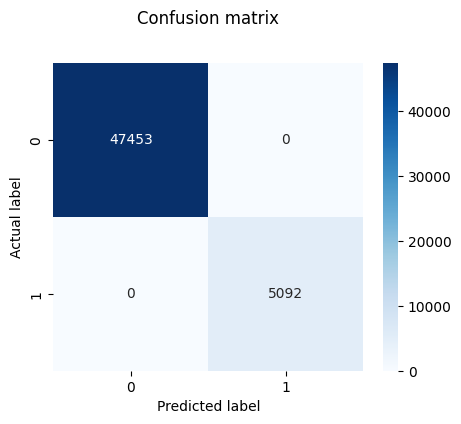

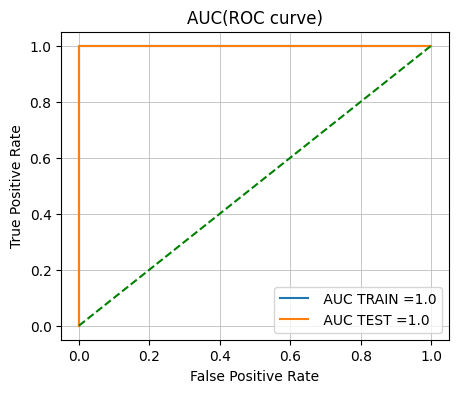

In [28]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,recall_score

cf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(5,4))
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap='Blues' ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Classification report
print(classification_report(y_test, y_pred))


# ROC curve
from sklearn.metrics import roc_curve, auc

y_train_pred = model.predict(X_train.values)    
y_test_pred = model.predict(X_test.values) 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

# plot ROC curve
fig = plt.figure(figsize=(5,4))

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid( linestyle='-', linewidth=0.5)
plt.show()

**Observations**

Based on the classification report above, the model has an accuracy score of 1 which means there were no wrong predictions (it would be great but not quite ideal in real case scenarios). This indicates an overfitting issue. Since it does well on both the training and testing data, maybe there is data leakage before the data was split into training and testing datasets (during standard scalling or so). By using different test data sets, maybe the accuracy of our model can be cross checked. Data scarcity in the case of the positive samples aren't large enough, the model can easily memorize these samples and this leads to overfitting.

As there was an imbalance in the target column () accuracy wouldnt be the most. Choosing the wrong metric (instead of Accuracy metric, we can opt for precision @ fixed recall, recall @ fixed precision or F1-Score which will take into account FNs. Our recall, precision and F1 score show 1.0 which would indicate a perfect model but isnt ideal but probable factors as mentioned above (data leakage, data scarcity) could be contribute to this scenario.

I suggest to rework on splitting the dataset into train and test even before the preprocessing steps to maintain the integrity of the dataset.

***How do you prevent overfitting in random forest models?***

   - Reduce tree depth.
       - reducing model complexity reduces overfitting problems 
       - reducing tree depth is the easiest way to reduce complexity in random forests. 
   - Reduce the number of variables sampled at each split. 
   - Use more data. 
        - Overfitting is more likely to happen when complex models are trained on small datasets 
        - so, increasing the size of your dataset may help.

***Advantages and disadvantages of Random forest algo.***

The advantages are:

    - accuracy score being high most of the times
    - without normalizing/scalling/ encoding categorical variables, the algo would run fine as it uses rule-based approach.
    - it works well with missing values
    - flexible to both categorical and continious values.
    
The disadvantages are :

    - overall, it requires more computational power,
    - requires more time for training as it has to combine various decision trees to inteprete the class.
    - it also suffers interpretability and fails to determine the significance of each variable.



#### Future Works
Relate the model performance to the client's financial performance with the introduction of the discount proposition.
How much money could a client save with the use of the model? What assumptions did you make to come to this conclusion?